In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#import dataset
cust_df = pd.read_csv("bank-full.csv", sep=";")
cust_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
#datset information
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#duplicate rows
cust_df[cust_df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


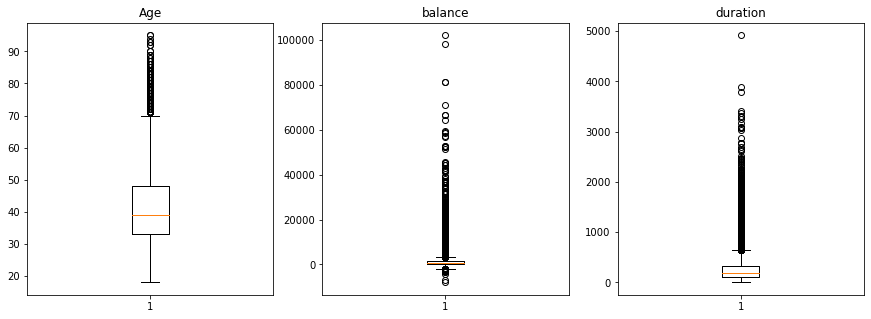

In [5]:
#Boxplot for continuous varibales to check outliers
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.boxplot(cust_df["age"])
plt.title("Age")

plt.subplot(132)
plt.boxplot(cust_df["balance"])
plt.title("balance")

plt.subplot(133)
plt.boxplot(cust_df["duration"])
plt.title("duration")
plt.show()

In [6]:
#drop Outliers for variable balance
bal_index = cust_df[cust_df["balance"] >= 80000]
cust_df_eda = cust_df.drop(bal_index.index, axis=0)

In [7]:
#Drop Outliers for variable duration
dur_index = cust_df_eda[cust_df_eda["duration"] >= 3700]
cust_df_eda = cust_df_eda.drop(dur_index.index, axis=0)

In [8]:
#Droping of columss which are not relavant ("contact", "day", "month", "pdays",  "previous")

cust_df_eda1 = cust_df_eda.drop(["contact","day", "month", "pdays","previous"],
                                axis=1)
cust_df_eda1.reset_index(inplace=True, drop=True)

In [9]:
#Update the column name

cust_df_eda1 = cust_df_eda1.rename({"y" : "TD_subscribed"}, axis=1)

In [10]:
#Class count
cust_df_eda1["TD_subscribed"].value_counts()

no     39918
yes     5286
Name: TD_subscribed, dtype: int64

In [11]:
#Check Outliers in catogorical variable
cust_df_eda1["job"].value_counts()

blue-collar      9732
management       9455
technician       7596
admin.           5171
services         4153
retired          2262
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
#Check Outliers in catogorical variable
cust_df_eda1["marital"].value_counts()

married     27209
single      12788
divorced     5207
Name: marital, dtype: int64

In [13]:
#Check Outliers in catogorical variable
cust_df_eda1["education"].value_counts()

secondary    23198
tertiary     13298
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
#Check Outliers in catogorical variable
cust_df_eda1["default"].value_counts()

no     44389
yes      815
Name: default, dtype: int64

In [15]:
#Check Outliers in catogorical variable
cust_df_eda1["housing"].value_counts()

yes    25129
no     20075
Name: housing, dtype: int64

In [16]:
#Check Outliers in catogorical variable
cust_df_eda1["loan"].value_counts()

no     37960
yes     7244
Name: loan, dtype: int64

In [17]:
#Dividing input and output variales
x = cust_df_eda1.iloc[:,0:-1]
y = cust_df_eda1.iloc[:,-1]

In [18]:
#Convert catogorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder

x_num = pd.get_dummies(x)

labelencoder = LabelEncoder()
y_num = labelencoder.fit_transform(y)

# Model

In [19]:
#Model
classifier = LogisticRegression(max_iter=500, class_weight="balanced")
classifier.fit(x_num, y_num)

LogisticRegression(class_weight='balanced', max_iter=500)

In [20]:
#Confusion matrix
matrix = confusion_matrix(y_num, classifier.predict(x_num))
matrix

array([[33021,  6897],
       [ 1144,  4142]], dtype=int64)

In [21]:
#Score Report
print(classification_report(y_num,classifier.predict(x_num)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     39918
           1       0.38      0.78      0.51      5286

    accuracy                           0.82     45204
   macro avg       0.67      0.81      0.70     45204
weighted avg       0.90      0.82      0.85     45204



In [22]:
#Area under the curve
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_num,classifier.predict(x_num))
round(auc,3)

0.805

Text(0, 0.5, 'True Positive Rate')

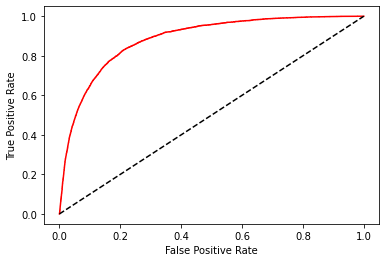

In [23]:
#ROC curve

fpr, tpr, thresholds = roc_curve(y_num, classifier.predict_proba (x_num)[:,1])
plt.plot(fpr, tpr, color="red")
plt.plot([0,1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')